In [26]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits  
from astropy.wcs import WCS

from utils_viz.data_utils import *


In [27]:
PATH_COHRS = "future_data/COHRS_10p50_0p00_CUBE_3T2_R2.fit"
PATH_COHRS_INTEG = "future_data/COHRS_10p50_0p00_INTEG_R2.fit"
PATH_COHRS_LV = "future_data/COHRS_10p50_0p00_LV_R2.fit"

PATH_SPINE = "future_data/reproject_spines.fits"

In [28]:
data_cohrs = fits.open(PATH_COHRS)
data_cohrs_integ = fits.open(PATH_COHRS_INTEG)
data_cohrs_lv = fits.open(PATH_COHRS_LV)

data_s2 = fits.open(PATH_SPINE)

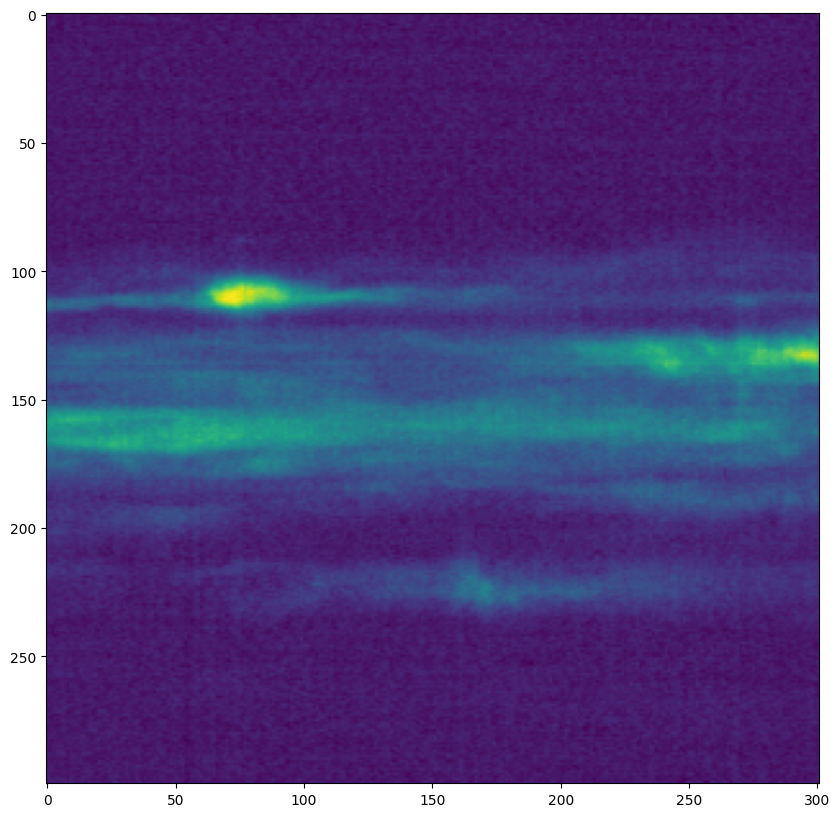

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(data_cohrs_lv[0].data[200:500])
plt.show()

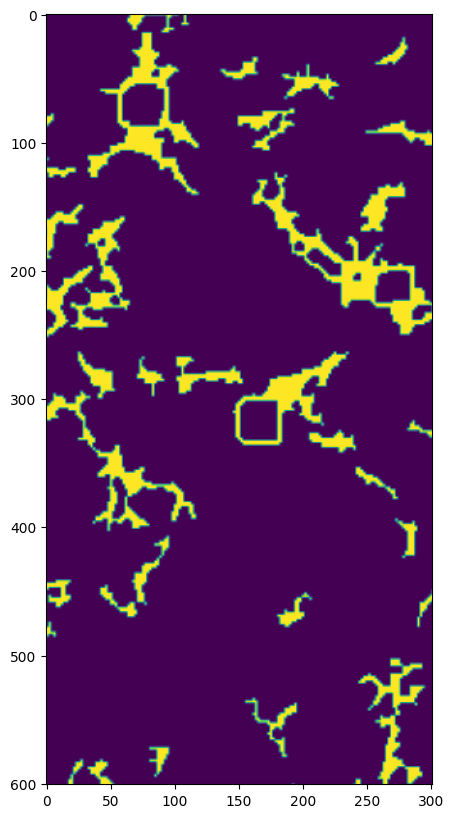

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(data_s2[0].data[0])
plt.show()

# Select filament

In [31]:
y_min, y_max = 260, 300 
x_min, x_max = 60, 100  

In [32]:
y_min, y_max = 120, 172 
x_min, x_max = 220, 300  

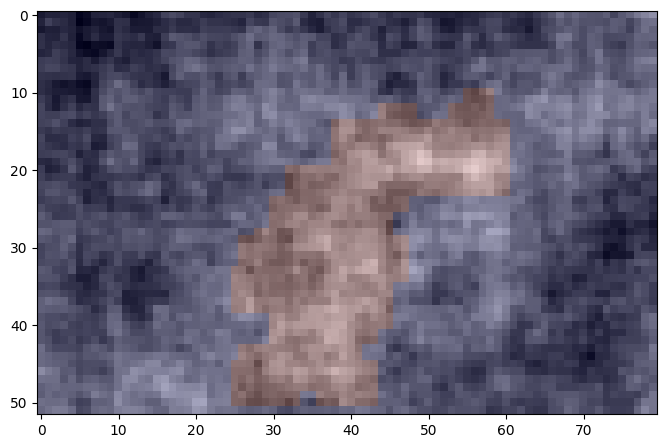

In [33]:
color_image2 = data_cohrs_integ[0].data
mask = data_s2[0].data[0].astype(bool)  

cropped_color_image2 = color_image2[y_min:y_max, x_min:x_max]
cropped_mask = mask[y_min:y_max, x_min:x_max]

plt.figure(figsize=(8, 8))
plt.imshow(cropped_color_image2, cmap='gray')  
plt.imshow(cropped_mask, cmap='jet', alpha=0.2)  
plt.show()

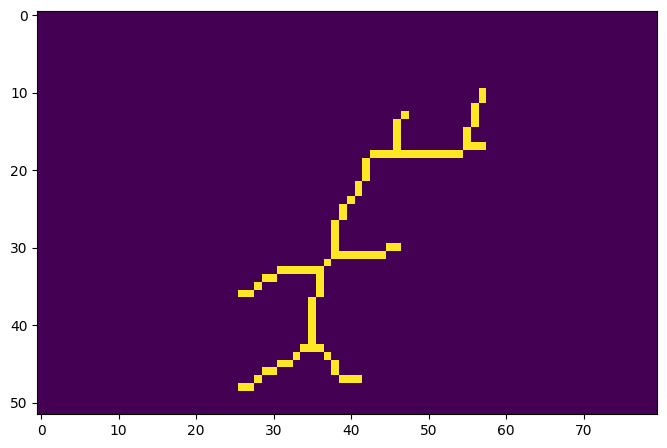

In [34]:
import skimage.morphology as morph
skeleton = morph.skeletonize(cropped_mask)
plt.figure(figsize=(8, 8))
plt.imshow(skeleton)  
plt.show()

# Study the filament

Tout pic qui a une longueur de sous pic de moins de x valeurs => bye

In [35]:
threshold = 2
min_len_souspic = 5

In [36]:
from utils_viz.noise import smooth_signal


header = data_cohrs[0].header

y_coords, x_coords = np.where(skeleton == 1)

points = list(zip(x_coords, y_coords))
multiplied_points_y_x = []
multiplied_points_y_x_z_v = []
l_speed = []

for i, (x, y) in enumerate(points):
    smoothed_signal = smooth_signal(data_cohrs[0].data[:, y_min:y_max, x_min:x_max][:, y, x], noisethr=0.95)

    sub_pic = []
    for idx, s in enumerate(smoothed_signal):
        if len(sub_pic)>0 and abs(convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], min(sub_pic)) - convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], idx)) >= 10:
            #print(abs(convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], min(sub_pic)) - convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], idx)))
            #ici
            if len(sub_pic) >= min_len_souspic :
                l_speed.append([convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], s) for s in sub_pic])
                multiplied_points_y_x.append((y,x))
                multiplied_points_y_x_z_v.extend([(y, x, z, convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], z)) for z in sub_pic])
            
            sub_pic = []
            #break
        elif s < threshold and len(sub_pic)>0:
            #ici
            if len(sub_pic) >= min_len_souspic :
                multiplied_points_y_x.append((y,x))
                l_speed.append([convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], s) for s in sub_pic])
                multiplied_points_y_x_z_v.extend([(y, x, z, convert_to_kms(header["CRPIX3"], header["CDELT3"], header["CRVAL3"], header["NAXIS3"], z)) for z in sub_pic])
                 
            sub_pic = []
            
        elif s > threshold :
            sub_pic.append(idx)

In [37]:
len(points)

86

In [38]:
len(multiplied_points_y_x)

131

In [39]:
len(multiplied_points_y_x_z_v)

1233

In [40]:
multiplied_points_y_x_z_v

[(np.int64(13), np.int64(47), 359, 27.411916437002702),
 (np.int64(13), np.int64(47), 360, 28.0469164370027),
 (np.int64(13), np.int64(47), 361, 28.6819164370027),
 (np.int64(13), np.int64(47), 362, 29.3169164370027),
 (np.int64(13), np.int64(47), 363, 29.9519164370027),
 (np.int64(13), np.int64(47), 364, 30.586916437002703),
 (np.int64(14), np.int64(46), 359, 27.411916437002702),
 (np.int64(14), np.int64(46), 360, 28.0469164370027),
 (np.int64(14), np.int64(46), 361, 28.6819164370027),
 (np.int64(14), np.int64(46), 362, 29.3169164370027),
 (np.int64(14), np.int64(46), 363, 29.9519164370027),
 (np.int64(14), np.int64(56), 354, 24.2369164370027),
 (np.int64(14), np.int64(56), 355, 24.871916437002703),
 (np.int64(14), np.int64(56), 356, 25.5069164370027),
 (np.int64(14), np.int64(56), 357, 26.141916437002703),
 (np.int64(14), np.int64(56), 358, 26.7769164370027),
 (np.int64(14), np.int64(56), 359, 27.411916437002702),
 (np.int64(14), np.int64(56), 360, 28.0469164370027),
 (np.int64(15), 

y c'est le long de l'axe à 601
x le long du 301

donc on prendra le deuxieme du tuple

In [41]:
y = [item[0] for item in multiplied_points_y_x_z_v]
x = [item[1] for item in multiplied_points_y_x_z_v]
z = [item[2] for item in multiplied_points_y_x_z_v]

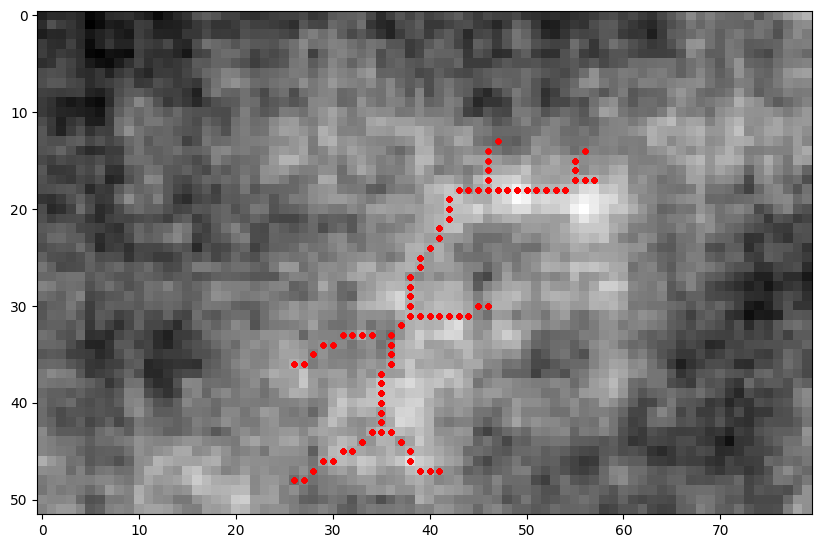

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(data_cohrs_integ[0].data[y_min:y_max, x_min:x_max], cmap='gray')  
plt.scatter(x, y, c='red', s=10)  # c='red' for red points, s=50 for size
plt.show()

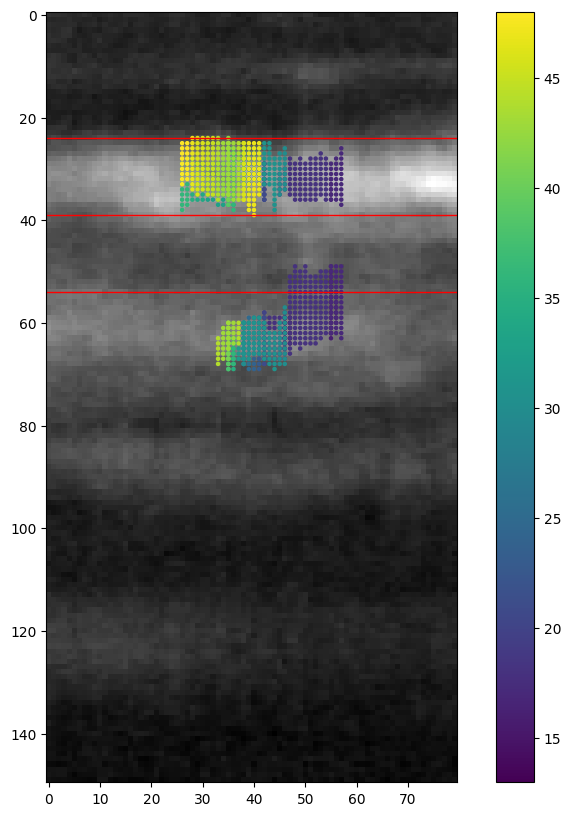

In [43]:
import math
zmin, zmax = 300, 450
z_sample = [zi - zmin for zi in z]

plt.figure(figsize=(10, 10))
plt.imshow(data_cohrs_lv[0].data[zmin:zmax, x_min:x_max], cmap='gray')  
plt.scatter(x, z_sample, c=y, s=5)

for i in range(math.floor(min(z_sample)), math.ceil(max(z_sample)), math.floor(10 * 1/header["CDELT3"])):
    plt.axhline(y=i, color='red', linestyle='-', linewidth=1)
    
plt.colorbar()
plt.show()

# Matrix distance

## passer en 3D

In [56]:
from collections import deque

def are_adjacent(p1, p2):
    return (abs(p1[0] - p2[0]) <= 1) and (abs(p1[1] - p2[1]) <= 1) and (abs(p1[3] - p2[3]) <= 1)

def get_adjacency_list(points):
    adjacency_list = {point: [] for point in points}

    for i, p1 in enumerate(adjacency_list.keys()):
        for j, p2 in enumerate(adjacency_list.keys()):
            if (p1[:3]!=p2[:3]) and are_adjacent(p1, p2) :
                adjacency_list[p1].append((p2, (p1[3]-p2[3])))

    return adjacency_list  

def path_distance(start_point, target_point, adjacency_list):

    # si x,y,z,v == x,y,z,v
    if start_point == target_point :
        return 0
    
    else :
        queue = deque([(start_point, 0)])  # (point actuel, accumulation de vitesse)
        visited = {(start_point, 0) : 0}  # Clé: (point, acc_speed), Valeur: distance parcourue
        
        while queue:
            current, acc_speed = queue.popleft()
            
            # Si on a atteint la cible, retourner la distance parcourue
            if current == target_point:
                if abs(acc_speed)>=10 :
                    print(acc_speed)
                return visited[(current, acc_speed)]
            
            # Sinon on regarde les voisins pour trouver un chemin
            for neighbor, speed_dist in adjacency_list[current]:
                new_acc_speed = acc_speed + speed_dist
                
                # Vérifier si on ne dépasse pas 10 en accumulation de vitesse
                if abs(new_acc_speed) < 10 and (neighbor, new_acc_speed) not in visited:
                    visited[(neighbor, new_acc_speed)] = visited.get((current, acc_speed), 0) + 1
                    queue.append((neighbor, new_acc_speed))

    return -1  # Si aucun chemin valide n'a été trouvé
    
adjacency_list = get_adjacency_list(multiplied_points_y_x_z_v)

In [57]:
adjacency_list

{(np.int64(13),
  np.int64(47),
  359,
  27.411916437002702): [((np.int64(13), np.int64(47), 360, 28.0469164370027),
   -0.634999999999998), ((np.int64(14), np.int64(46), 359, 27.411916437002702),
   0.0), ((np.int64(14), np.int64(46), 360, 28.0469164370027),
   -0.634999999999998)],
 (np.int64(13),
  np.int64(47),
  360,
  28.0469164370027): [((np.int64(13), np.int64(47), 359, 27.411916437002702),
   0.634999999999998), ((np.int64(13), np.int64(47), 361, 28.6819164370027),
   -0.6350000000000016), ((np.int64(14),
    np.int64(46),
    359,
    27.411916437002702),
   0.634999999999998), ((np.int64(14), np.int64(46), 360, 28.0469164370027),
   0.0), ((np.int64(14), np.int64(46), 361, 28.6819164370027),
   -0.6350000000000016)],
 (np.int64(13),
  np.int64(47),
  361,
  28.6819164370027): [((np.int64(13), np.int64(47), 360, 28.0469164370027),
   0.6350000000000016), ((np.int64(13), np.int64(47), 362, 29.3169164370027),
   -0.634999999999998), ((np.int64(14), np.int64(46), 360, 28.0469164

In [59]:
def compare_two_speeds(v1,v2):
    dist = abs(v1-v2)
    return dist

In [60]:
from tqdm import tqdm

n_points = len(multiplied_points_y_x_z_v)

distance_matrix_speed = np.zeros((n_points, n_points))
distance_matrix_path = np.zeros((n_points, n_points))

for i in tqdm(range(n_points), "On i"):
    distance_matrix_speed[i, i] = 0
    distance_matrix_path[i, i] = 0
    
    p1 = multiplied_points_y_x_z_v[i]

    for j in range(i + 1, n_points):  
        p2 = multiplied_points_y_x_z_v[j]

        dist_kms = compare_two_speeds(p1[3], p2[3])
        distance_matrix_speed[i, j] = dist_kms
        distance_matrix_speed[j, i] = dist_kms
        
        dist = path_distance(p1, p2, adjacency_list)
        distance_matrix_path[i, j] = dist
        distance_matrix_path[j, i] = dist

On i: 100%|██████████| 1233/1233 [07:19<00:00,  2.81it/s]


## corriger car le chemin entre x et y doit être trouvé qu'avec des z à cotés

In [61]:
intersection = (distance_matrix_speed<10).astype(np.int8) & (distance_matrix_path!=-1).astype(np.int8)

In [62]:
import networkx as nx
import numpy as np
from networkx.algorithms.clique import find_cliques

G = nx.from_numpy_array((intersection).astype(np.int8))
cliques = list(find_cliques(G))

def merge_cliques(cliques):
    merged_cliques = []
    while cliques:
        clique = cliques.pop(0)
        to_merge = []
        for other_clique in cliques:
            if set(clique) & set(other_clique):
                to_merge.append(other_clique)
        clique += [node for other_clique in to_merge for node in other_clique]
        cliques = [other_clique for other_clique in cliques if other_clique not in to_merge]
        merged_cliques.append(clique)
    return merged_cliques

merged_cliques = merge_cliques(cliques)

node_to_clique = {}
for clique_id, clique in enumerate(merged_cliques):
    for node in clique:
        node_to_clique[node] = clique_id
labels = [node_to_clique[node] for node in range(len(distance_matrix_speed))]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [63]:
np.unique(np.array(labels))

array([0, 1, 2, 3, 4])

# Plot 3D

In [64]:
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [65]:
# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y, 'z': z, 'label': labels})
data['label'] = data['label'].astype('category')

colors = [
    "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231",
    "#911eb4", "#46f0f0", "#f032e6", "#d2f53c", "#fabebe",
    "#008080", "#e6beff", "#aa6e28", "#800000", "#aaffc3",
    "#808000", "#ffd8b1", "#000080", "#808080", "#FFFFFF"
]
fig = px.scatter_3d(
    data,
    x='x',
    y='y',
    z='z',
    color='label',
    color_discrete_sequence=colors,  # Utilisation de la colormap personnalisée
    title="Interactive 3D Scatter Plot"
)
fig.update_traces(marker=dict(size=5))  

z_min = math.floor(min(z))
z_max = math.ceil(max(z))
step = max(1, math.floor(10 * 1/header["CDELT3"]))  
for i in range(z_min, z_max, step):
    fig.add_trace(go.Mesh3d(
        x=[min(x), max(x), max(x), min(x)],  
        y=[min(y), min(y), max(y), max(y)],  
        z=[i, i, i, i],  
        opacity=0.5
    ))

fig.show()

# Superpose 3D

In [ ]:
data_cohrs[0].data.shape

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

z_min, z_max = 300, 400
x_flat, y_flat, z_flat = np.meshgrid(np.arange(x_min, x_max + 1),
                      np.arange(y_min, y_max + 1),
                      np.arange(z_min, z_max + 1))
x_flat = x_flat.flatten()
y_flat = y_flat.flatten()
z_flat = z_flat.flatten()
value = data_cohrs[0].data[z_min:z_max + 1, y_min:y_max + 1, x_min:x_max + 1].flatten()


y_points = [item[0] + y_min for item in multiplied_points_y_x_z_v]
x_points = [item[1] + x_min for item in multiplied_points_y_x_z_v]
z_points = [item[2] - 0 for item in multiplied_points_y_x_z_v]
data = pd.DataFrame({'x': x_points, 'y': y_points, 'z': z_points, 'label':labels})
scatter_fig = px.scatter_3d(
    data, x='x', y='y', z='z', color='label',
    title="Interactive 3D Scatter Plot")
scatter_fig.update_traces(marker=dict(size=5))


volume_fig = go.Figure()
volume_fig.add_trace(scatter_fig.data[0])
volume_fig.add_trace(go.Volume(
    x=x_flat,  
    y=y_flat,  
    z=z_flat,  
    value=value, 
    opacity=0.5,  
    isomin=value.min(),
    isomax=value.max(),
    colorscale="gray"))

volume_fig.show()

# Loris

In [ ]:
COHRS_data = data_cohrs[0].data
COHRS_header = data_cohrs[0].header

cluster_data = np.zeros_like(COHRS_data)
for i in range (len(labels)) :
    l = labels[i]
    xi = x[i]
    yi = y[i]
    zi = z[i]
    cluster_data[zi, yi, xi] = l
fits.writeto("future_data/COHRS_clustered.fits", cluster_data, COHRS_header, overwrite=True)

In [ ]:
data_c = fits.open("future_data/COHRS_clustered.fits")

In [ ]:
data_c[0].data.shape

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(data_c[0].data[300])
plt.show()